# Homework 1. Exploratory Data Analysis, Prob2 GapMinder


Based on Harvard CS109.

All your submitted work should be your own.
---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import requests
from io import BytesIO
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. Submit an Ipython notebook with your original solutions filled in.

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [2]:
request = requests.get('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv', verify=True)
countries = pd.read_csv(BytesIO(request.content))
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [3]:
request = requests.get('http://www.gapminder.org/documentation/documentation/gapdata001%20v14.xlsx')
income = pd.read_excel(BytesIO(request.content), sheetname=1)
income = income.loc[:,['Area', 'Year', 'GDP per capita - with interpolations']]
income.head()

,Area,Year,GDP per capita - with interpolations
0,Abkhazia,2005,NaN
1,Abkhazia,2006,NaN
2,Abkhazia,2007,NaN
3,Abkhazia,2008,NaN
4,Abkhazia,2009,NaN


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [4]:
data_transf = pd.pivot_table(income, values='GDP per capita - with interpolations', index='Year', columns='Area')
data_transf.head()

Area,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,West Bank and Gaza,West Germany,Western Sahara,Yemen Arab Republic (Former),Yemen Democratic (Former),"Yemen, Rep.",Yugoslavia,Zambia,Zimbabwe,Åland
Year,,,,,,,,,,,,,,,,,,,,,
1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [5]:
income_02 = income[income.Year==2002]
income_02.head()

data_transf_02 = pd.pivot_table(income_02, values='GDP per capita - with interpolations', index='Year', columns='Area')
data_transf_02_res = data_transf_02.reset_index()
data_transf_02_res.head()



Area,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis et Futuna,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,2002,726.734055,4604.211737,5288.040382,8200.790273,34485.483523,2773.287312,15179.260049,12874.342595,8797.640716,...,7727.002004,1724.295507,3234.458141,8605.047831,1764.456677,3079.976366,4515.487575,2234.820827,1071.613938,672.038623


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [6]:
def mergeByYear(yr):
    yr_income = income[income.Year == yr]
    yr_income = yr_income.rename(columns={'Area': 'Country', 'GDP per capita - with interpolations': 'Income'})
    yr_income = yr_income.loc[:,['Country', 'Income']]  
    join = pd.merge(countries, yr_income, on=['Country'], how='inner')
    return join
    
mergeByYear(2010).head()


,Country,Region,Income
0,Algeria,AFRICA,6300.648214
1,Angola,AFRICA,5497.618103
2,Benin,AFRICA,1438.986214
3,Botswana,AFRICA,13181.342015
4,Burundi,AFRICA,468.432182


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [7]:
def plots(year):
    
    reg_08 = mergeByYear(year).groupby('Region').sum()
    new_reg_08 = reg_08.reset_index()
    income_08 = new_reg_08["Income"]
    region_08 = new_reg_08["Region"]

    reg_08_nums    = region_08 .values
    income_08_nums = income_08 .values

    plt.figure(num=None, figsize=(14, 4), dpi=300, facecolor='w', edgecolor='k')
    plt.bar(range(len(new_reg_08)), income_08_nums,    width=0.4, align='center', color='g', label='total')
    plt.xticks(range(6), reg_08_nums)
    plt.title('Distribution of income per person by region in ' +str(year))
    plt.grid(True)
        #plt.show()


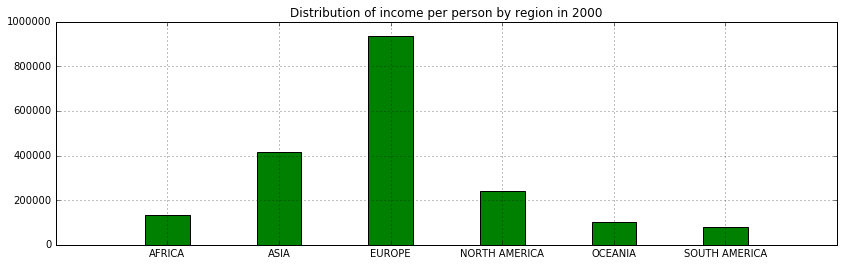

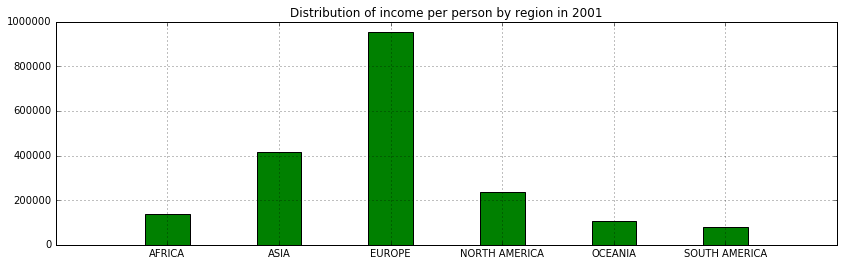

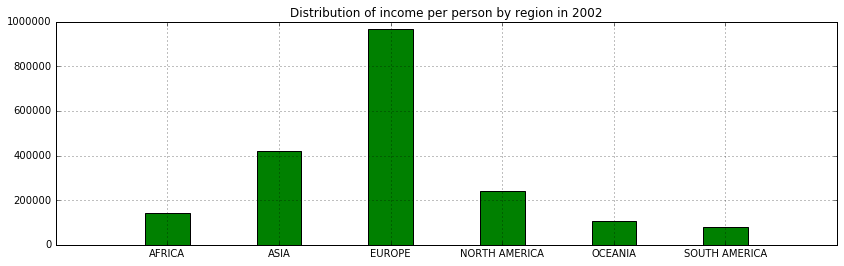

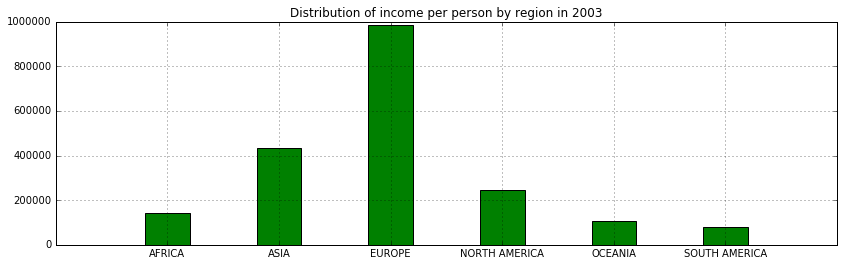

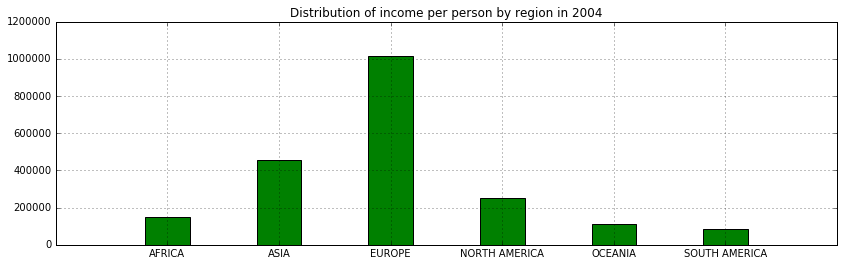

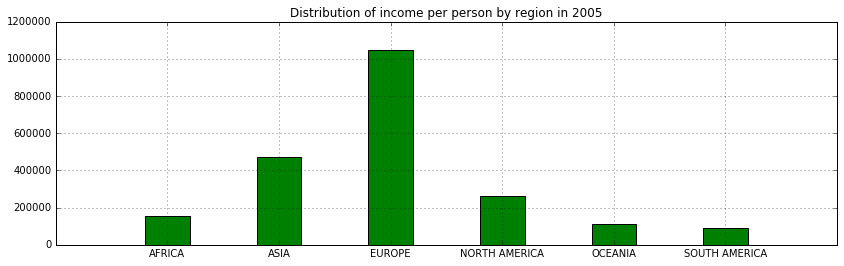

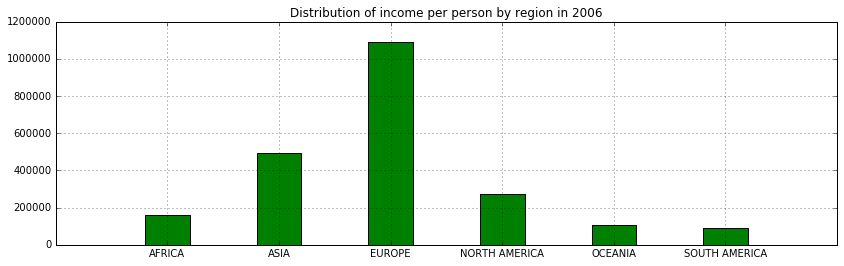

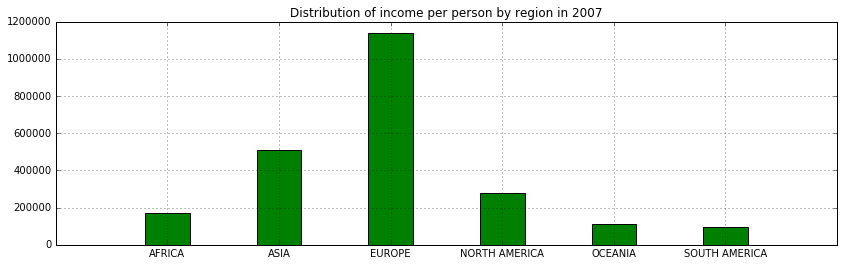

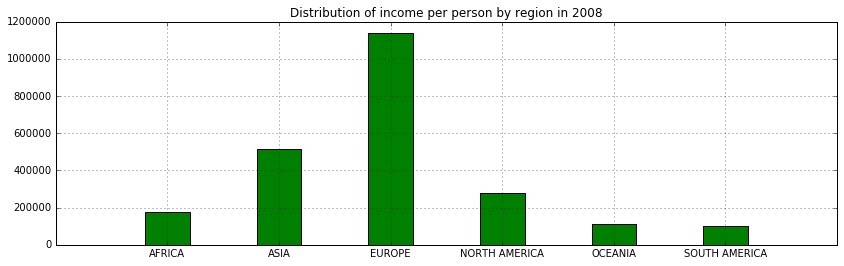

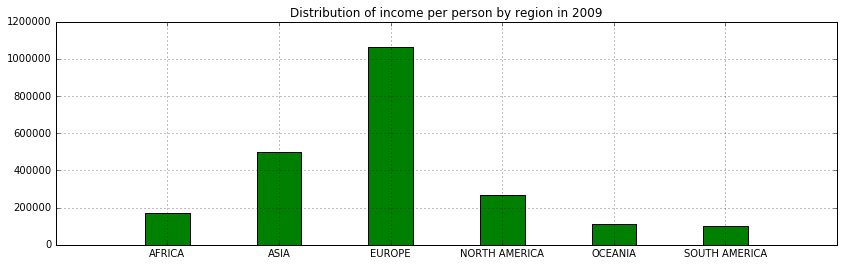

In [8]:
for year in range(2000, 2010):
    plots(year)
    plt.figure(num=None, figsize=(14, 4), dpi=300, facecolor='w', edgecolor='k')
plt.show()


### Discussion for Problem 2
Not too much growth for all continents from year 2000 to 2009 during which Europe has the the highest income, followwd by Asia then North America.
